In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from collections import Counter

In [2]:
DiabetesData = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
DiabetesData.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

# Data Cleaning

In [4]:
#Check for missing values
print(DiabetesData.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [5]:
#check for duplicates
duplicates = DiabetesData[DiabetesData.duplicated()]
print("number of duplicate rows: ", duplicates.shape)

number of duplicate rows:  (3854, 9)


In [6]:
#get rid of duplicates
DiabetesData = DiabetesData.drop_duplicates()

In [7]:
#describe the data to get a simple overview
DiabetesData.describe()

age  hypertension  heart_disease           bmi   HbA1c_level  \
count  96146.000000  96146.000000   96146.000000  96146.000000  96146.000000   
mean      41.794326      0.077601       0.040803     27.321461      5.532609   
std       22.462948      0.267544       0.197833      6.767716      1.073232   
min        0.080000      0.000000       0.000000     10.010000      3.500000   
25%       24.000000      0.000000       0.000000     23.400000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     29.860000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes  
count         96146.000000  96146.000000  
mean            138.218231      0.088220  
std              40.909771      0.283616  
min              80.000000      0.000000  
25%             100.000000      0.000000  
50%             140.000000      0.000000  
75%             159.000000      0.000000  
max             300.000000      1.000000

# Data Analysis
# Univariate data analysis

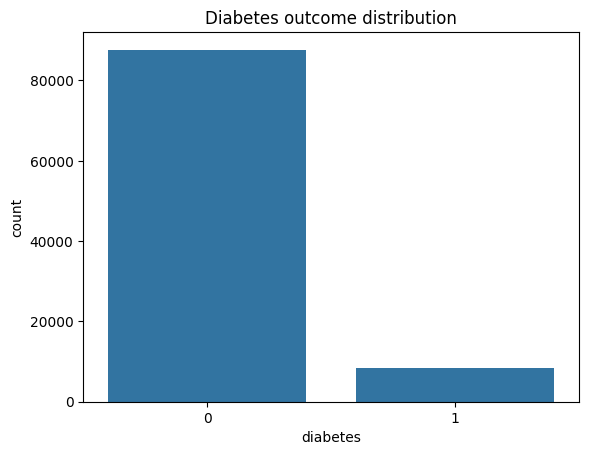

In [8]:
sns.countplot(x="diabetes", data= DiabetesData)
plt.title("Diabetes outcome distribution")
plt.show()

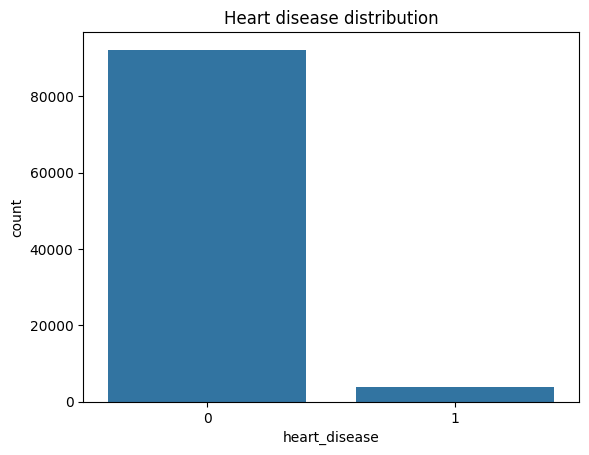

In [9]:
sns.countplot(x="heart_disease", data= DiabetesData)
plt.title("Heart disease distribution")
plt.show()

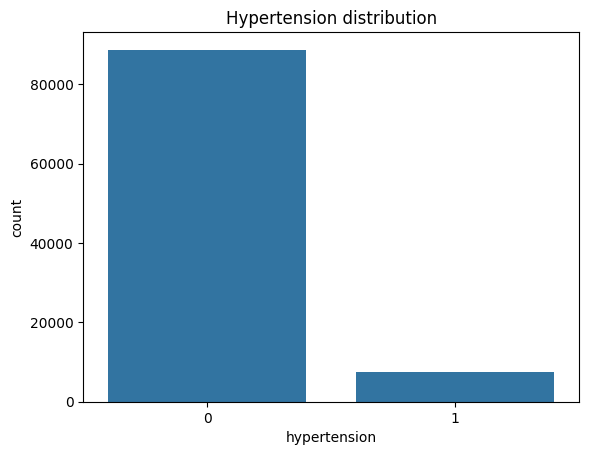

In [10]:
sns.countplot(x="hypertension", data= DiabetesData)
plt.title("Hypertension distribution")
plt.show()

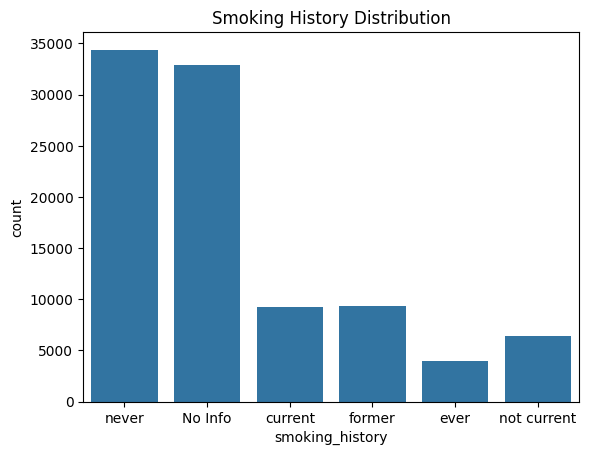

In [11]:
sns.countplot(x='smoking_history', data=DiabetesData)
plt.title('Smoking History Distribution')
plt.show()

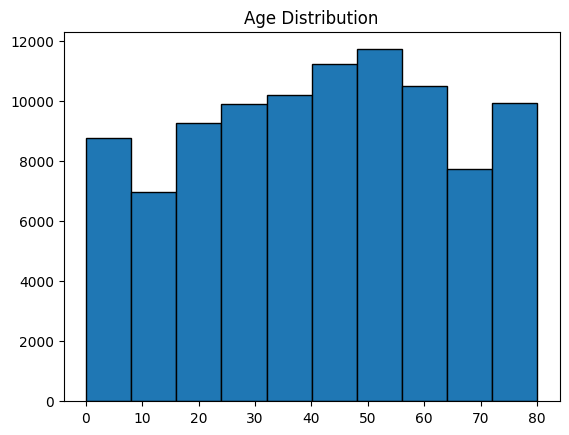

In [12]:
plt.hist(x='age', data=DiabetesData, edgecolor="black")
plt.title('Age Distribution')
plt.show()

# Bivariate data analysis

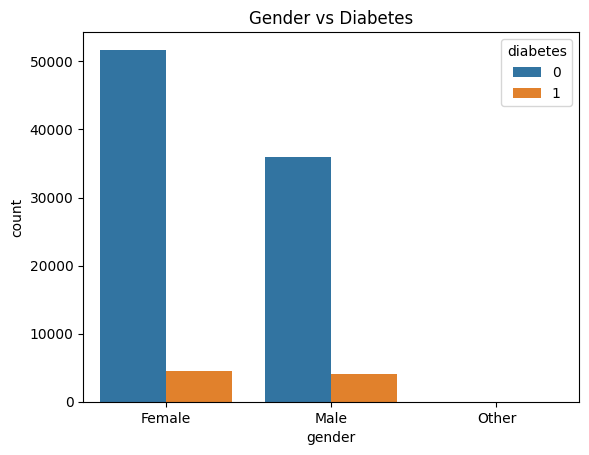

In [13]:
#Diabetes and Gender
sns.countplot(x='gender', hue='diabetes', data=DiabetesData)
plt.title('Gender vs Diabetes')
plt.show()

In [14]:
DiabetesData = DiabetesData[DiabetesData['gender'] != 'Other']

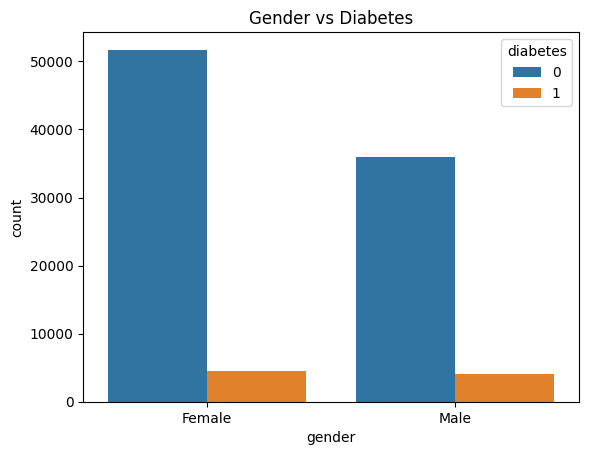

In [15]:
sns.countplot(x='gender', hue='diabetes', data=DiabetesData)
plt.title('Gender vs Diabetes')
plt.show()

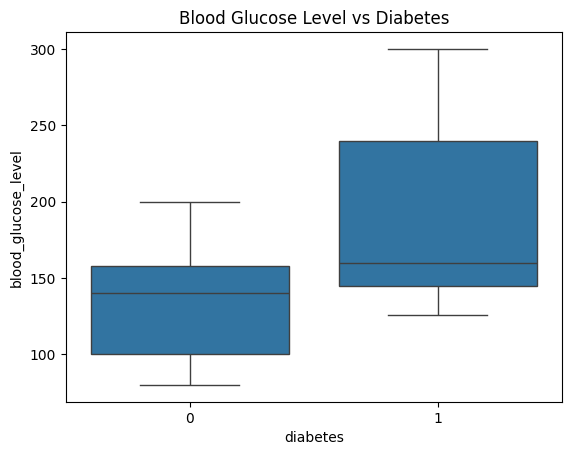

In [16]:
# Boxplot BMI vs Diabetes classification
# First blue boxplot (Non-Diabetic - 0): Lower median (~140) and less variability in blood glucose levels.
#Second boxplot (Diabetic - 1): Higher median (~160-170) with greater spread, indicating more variation in glucose levels.
sns.boxplot(x='diabetes', y='blood_glucose_level', data=DiabetesData)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()


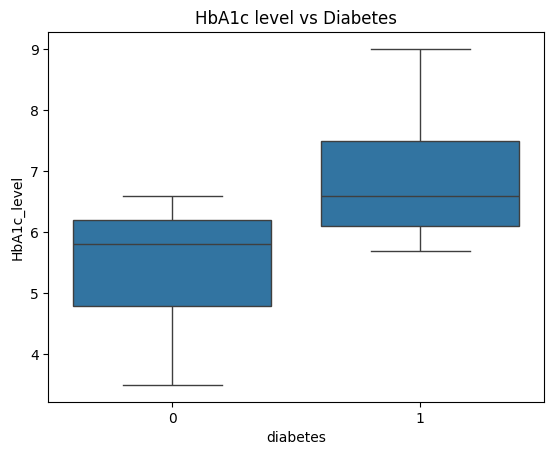

In [17]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=DiabetesData)
plt.title('HbA1c level vs Diabetes')
plt.show()

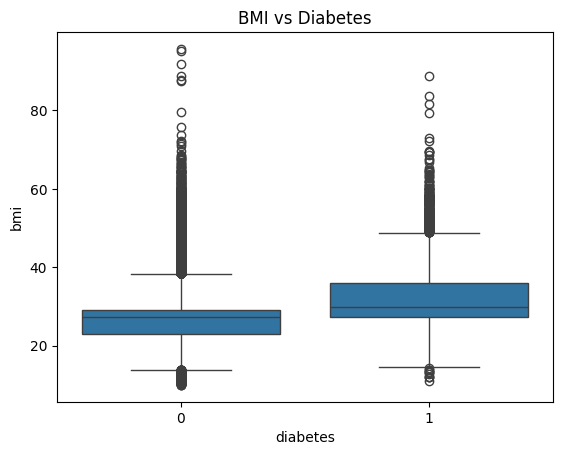

In [18]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=DiabetesData)
plt.title('BMI vs Diabetes')
plt.show()

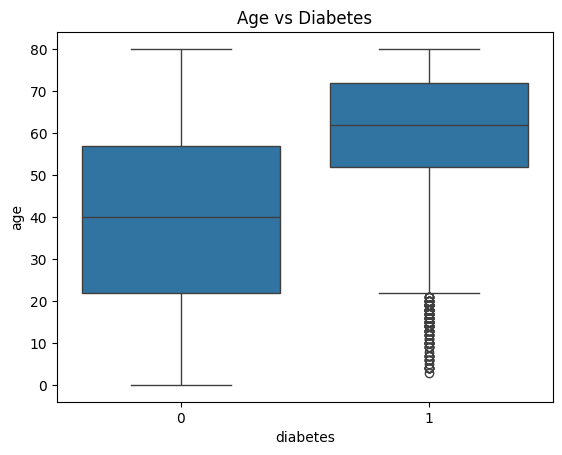

In [19]:
sns.boxplot(x='diabetes', y='age', data = DiabetesData)
plt.title('Age vs Diabetes')
plt.show()

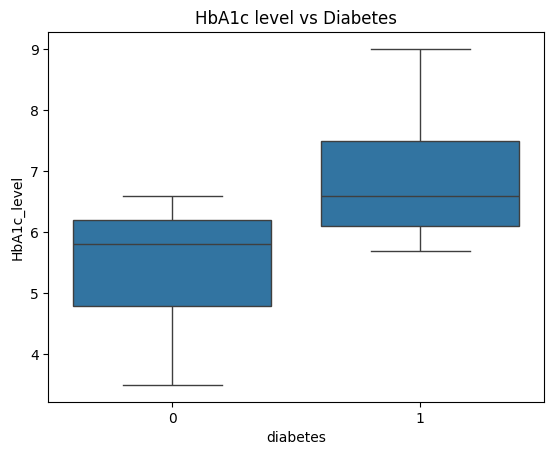

In [20]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=DiabetesData)
plt.title('HbA1c level vs Diabetes')
plt.show()

# Multivariate Analysis with One Hot Encoding

In [21]:
#Encode smoking history and gender
encoded_gender = pd.get_dummies(DiabetesData['gender'], prefix= 'gender_encoded')
encoded_smoking = pd.get_dummies(DiabetesData['smoking_history'], prefix= 'smoking_history_encoded')

#Drop original columns
DiabetesData = pd.concat([DiabetesData.drop('gender',axis=1),encoded_gender],axis=1)
DiabetesData = pd.concat([DiabetesData.drop('smoking_history',axis=1),encoded_smoking],axis=1)
DiabetesData.head()

age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_encoded_Female  gender_encoded_Male  \
0         0                   True                False   
1         0                   True                False   
2         0                  False                 True   
3         0                   True                False   
4         0                  False                 True   

   smoking_history_encoded_No Info  smoking_history_encoded_current  \
0                            False                            False   
1                             True                            False   
2                            False                            False   
3                            False                             True   
4                            False                             True   

   smoking_history_encoded_ever  smoking_history_encoded_former  \
0                         False                           False   
1                         False                           False   
2                         False                           False   
3                         False                           False   
4                         False                           False   

   smoking_history_encoded_never  smoking_history_encoded_not current  
0                           True                                False  
1                          False                                False  
2                           True                                False  
3                          False                                False  
4                          False                                False

# Correlation matrix

## A correlation matrix shows how all the possible pairs of values in a table are related to each other. Here’s how the matrix works:

A value of 1 indicates a strong positive relationship between two variables.
A value of 0 suggests no relationship between them.
A value of -1 signals a strong negative or inverse relationship.

Text(0.5, 1.0, 'Correlation matrix')

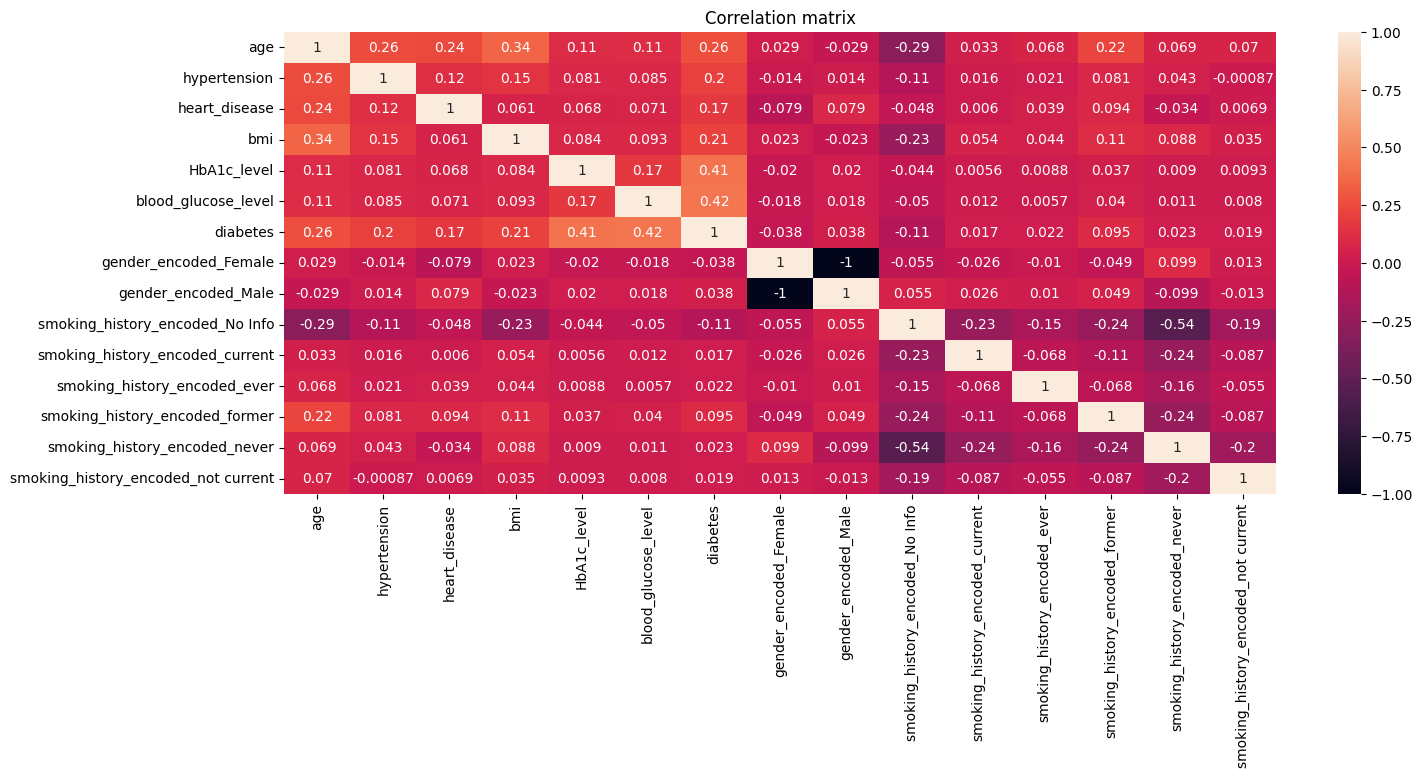

In [22]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(DiabetesData.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title("Correlation matrix")

## This gives us a very good idea of how every single variable interacts with the others. However, we want to focus on how the independant variables affect our dependent variable, which is diabetes.


Text(0.5, 1.0, 'Features correlating with diabetes')

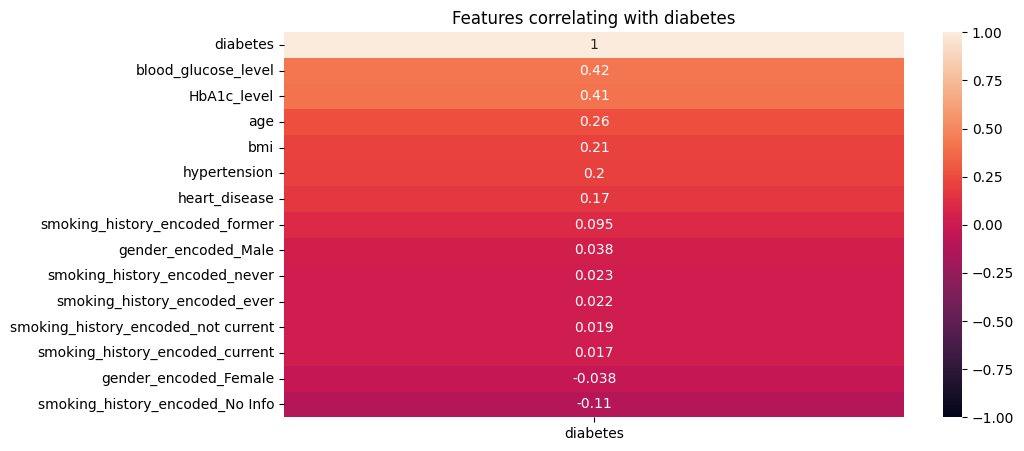

In [23]:
plt.figure(figsize = (10, 5))
heatmap = sns.heatmap(DiabetesData.corr()[['diabetes']].sort_values(by = 'diabetes', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title("Features correlating with diabetes")

### Extreme values of -1 and 1 indicate a perfect linear relationship, meaning that a change in one variable is always accompanied by a consistent change in the other.
### A coefficient of zero signifies no linear relationship, where changes in one variable show no tendency to influence the other.
### Values between 0 and ±1 represent varying degrees of relationship strength. As the correlation coefficient moves closer to -1 or 1, the relationship between the variables becomes stronger.

## Preprocessing

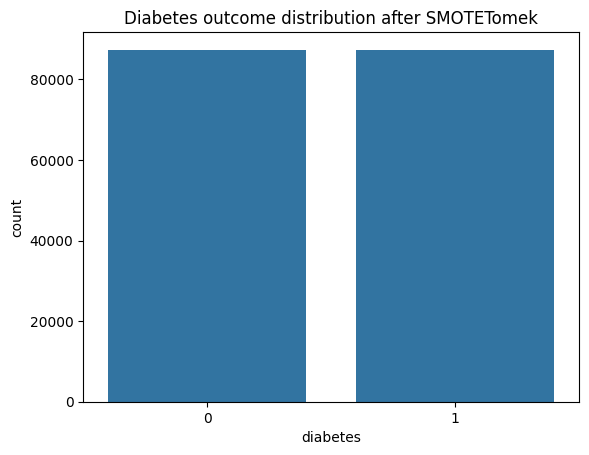

In [24]:
# We first split our data into training and testing sets
X = DiabetesData.drop('diabetes', axis=1)
y = DiabetesData['diabetes']

#SMOTETomek
smt = SMOTETomek(random_state=42)
X, y = smt.fit_resample(X, y)

#Visualizing the diabetes data after SMOTETomek
resampled_data = pd.DataFrame(y, columns=['diabetes'])
sns.countplot(x="diabetes", data=resampled_data)
plt.title("Diabetes outcome distribution after SMOTETomek")
plt.show()

## Scaling

In [25]:
#we only want to standardize numerical data, so we split put data in categorical and numerical
numeric = [ 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical = [col for col in DiabetesData.columns if 'gender_encoded' in col or 'smoking_history_encoded' in col]
scaler = StandardScaler()
X_numeric_std = pd.DataFrame(data=scaler.fit_transform(X[numeric]), columns=numeric)
X_std = pd.merge(X_numeric_std, X[categorical], left_index=True, right_index=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model building

### Decision Tree Classifier

In [26]:
#Defining the parameters to test
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Initialize decision tree
DTModel = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator = DTModel, 
                           param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy') 
grid_search.fit(X_train, y_train) 

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)

# Print the results
print('Best Parameters:', best_params)
print({accuracy_best})

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}
{0.971633844744676}


Model Accuracy:  0.971633844744676
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17382
           1       0.98      0.97      0.97     17554

    accuracy                           0.97     34936
   macro avg       0.97      0.97      0.97     34936
weighted avg       0.97      0.97      0.97     34936



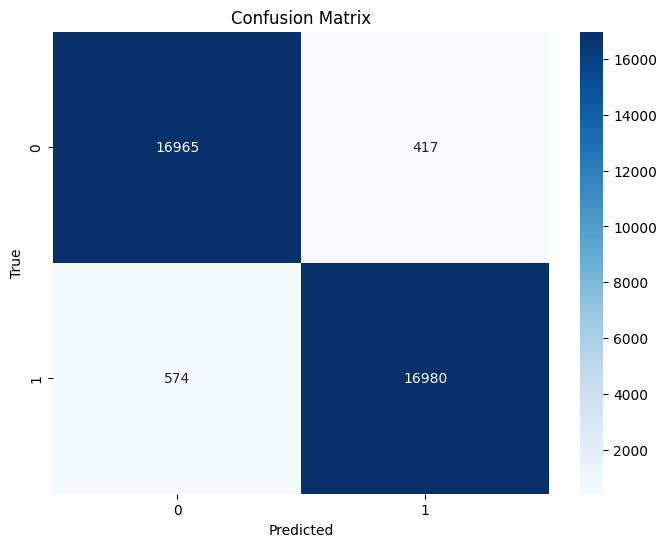

In [27]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Defining the parameters to test
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Suitable solver for l1 and l2 penalties
}

# Initialize Logistic Regression
LRModel = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(estimator=LRModel, 
                              param_grid=param_grid_lr, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best model
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

# Make predictions on the test set using the best model
y_pred_lr_best = best_model_lr.predict(X_test)

# Evaluate the best model
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)

# Print the results
print('Best Parameters:', best_params_lr)
print('Accuracy:', accuracy_lr_best)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9405198076482711


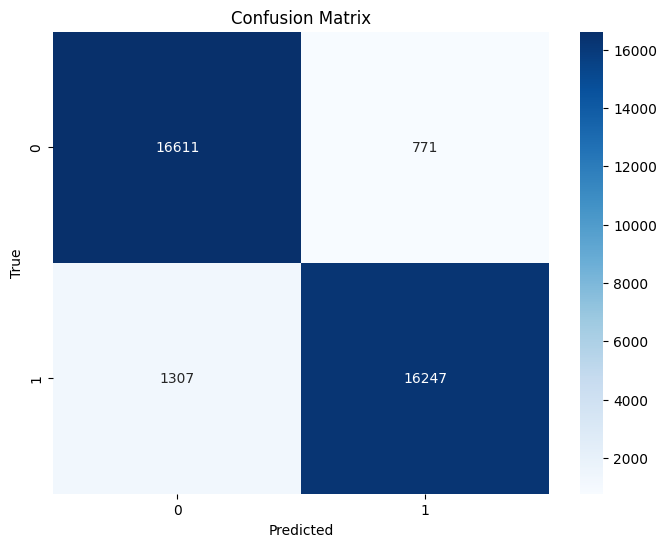

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     17382
           1       0.95      0.93      0.94     17554

    accuracy                           0.94     34936
   macro avg       0.94      0.94      0.94     34936
weighted avg       0.94      0.94      0.94     34936



In [31]:
cm = confusion_matrix(y_test, y_pred_lr_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report for additional insights
print(classification_report(y_test, y_pred_lr_best))

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Fit and evaluate Decision Tree model
best_model.fit(X_train, y_train)
y_pred_dt = best_model.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
f1_score_dt = report_dt['weighted avg']['f1-score']

# Fit and evaluate Logistic Regression model
best_model_lr.fit(X_train, y_train)
y_pred_lr = best_model_lr.predict(X_test)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
f1_score_lr = report_lr['weighted avg']['f1-score']

# Create a Voting Classifier with both models
voting_clf = VotingClassifier(estimators=[
    ('DecisionTree', best_model),
    ('LogisticRegression', best_model_lr)
], voting='hard')  # 'hard' for majority voting, 'soft' for probability-based voting

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Classification Report to calculate F1-score
report_voting = classification_report(y_test, y_pred_voting, output_dict=True)
f1_score_voting = report_voting['weighted avg']['f1-score']

# Print F1 scores of individual models and the Voting Classifier
print(f"Decision Tree F1-score: {f1_score_dt}")
print(f"Logistic Regression F1-score: {f1_score_lr}")
print(f"Voting Classifier F1-score: {f1_score_voting}")

# Choose the best model based on F1-score
if f1_score_voting > max(f1_score_dt, f1_score_lr):
    print("🏆 Best Model: Voting Classifier")
    final_model = voting_clf
elif f1_score_dt > f1_score_lr:
    print("🏆 Best Model: Decision Tree")
    final_model = best_model
else:
    print("🏆 Best Model: Logistic Regression")
    final_model = best_model_lr


Decision Tree F1-score: 0.9716338994771537
Logistic Regression F1-score: 0.940510298550168
Voting Classifier F1-score: 0.9529922251197748
🏆 Best Model: Decision Tree


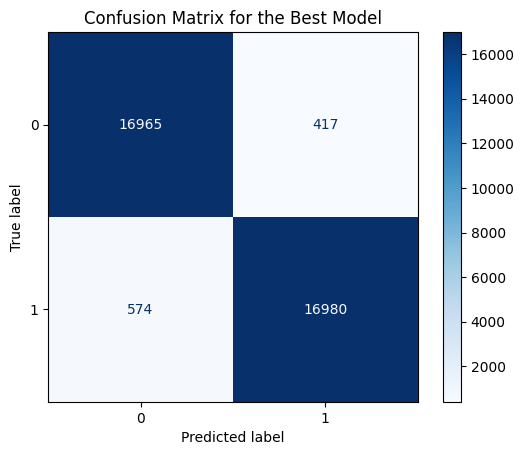

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using the final model
y_pred_final = final_model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for the Best Model")
plt.show()


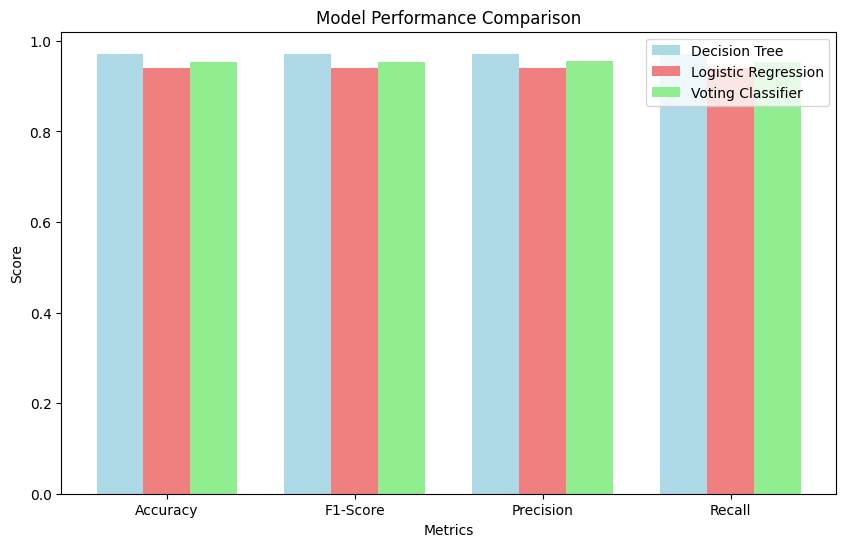

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Metrics for each model
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall']

# Compute accuracy for individual models
accuracy_best = accuracy_score(y_test, y_pred_best)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)

# Collect metrics for each model
dt_metrics = [accuracy_best, f1_score_dt, 
              precision_score(y_test, y_pred_best, average='weighted'), 
              recall_score(y_test, y_pred_best, average='weighted')]

lr_metrics = [accuracy_lr_best, f1_score_lr, 
              precision_score(y_test, y_pred_lr_best, average='weighted'), 
              recall_score(y_test, y_pred_lr_best, average='weighted')]

voting_metrics = [accuracy_score(y_test, y_pred_voting), f1_score_voting,
                  precision_score(y_test, y_pred_voting, average='weighted'), 
                  recall_score(y_test, y_pred_voting, average='weighted')]

# Combine results
results = np.array([dt_metrics, lr_metrics, voting_metrics])

# Plotting
bar_width = 0.25
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(index, results[0], bar_width, label='Decision Tree', color='lightblue')
plt.bar(index + bar_width, results[1], bar_width, label='Logistic Regression', color='lightcoral')
plt.bar(index + 2 * bar_width, results[2], bar_width, label='Voting Classifier', color='lightgreen')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()


In [37]:
print("Decision Tree Metrics:", dt_metrics)
print("Logistic Regression Metrics:", lr_metrics)
print("Voting Classifier Metrics:", voting_metrics)


Decision Tree Metrics: [0.971633844744676, 0.9716338994771537, 0.971673199972144, 0.971633844744676]
Logistic Regression Metrics: [0.9405198076482711, 0.940510298550168, 0.940943845963574, 0.9405198076482711]
Voting Classifier Metrics: [0.9530570185482025, 0.9529922251197748, 0.9559436293448368, 0.9530570185482025]


In [38]:
from sklearn.metrics import confusion_matrix

print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_best))
print("Voting Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))


Decision Tree Confusion Matrix:
 [[16965   417]
 [  574 16980]]
Logistic Regression Confusion Matrix:
 [[16611   771]
 [ 1307 16247]]
Voting Classifier Confusion Matrix:
 [[17255   127]
 [ 1513 16041]]


In [39]:
print("Results Matrix:\n", results)


Results Matrix:
 [[0.97163384 0.9716339  0.9716732  0.97163384]
 [0.94051981 0.9405103  0.94094385 0.94051981]
 [0.95305702 0.95299223 0.95594363 0.95305702]]


In [54]:
from sklearn.model_selection import cross_val_score

# Ensure the final model is trained
if not hasattr(final_model, "fit"):
    print("Error: final_model is not trained. Train the model before cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')

    # Display results
    print("Cross-validation scores:", cv_scores)
    print("Mean Accuracy:", round(cv_scores.mean(), 4))
    print("Standard Deviation:", round(cv_scores.std(), 4))



Cross-validation scores: [0.92506297 0.98179528 0.9814518  0.9810219  0.98024903]
Mean Accuracy: 0.9699
Standard Deviation: 0.0224


In [55]:
import joblib

# Save the final selected model
joblib.dump(final_model, 'best_model.pkl')


['best_model.pkl']

In [56]:
import pickle

# Load the model
with open("best_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Print the expected feature names
if hasattr(model, "feature_names_in_"):
    print("Expected features:", model.feature_names_in_)
else:
    print("Feature names not found. Check your preprocessing steps.")


Feature names not found. Check your preprocessing steps.


In [57]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Print column names
print(df.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [58]:
import pickle

# Load the model
with open("best_model.pkl", "rb") as file:
    model = pickle.load(file)

print(type(model))


<class 'numpy.ndarray'>


In [61]:
import pickle

# Assume 'final_model' is your trained model
with open("best_model.pkl", "wb") as model_file:
    pickle.dump(final_model, model_file)


In [62]:
import pickle

with open("best_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

print(type(model))  # Check if this prints a model class


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
